<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/Two_dimensional_arrays_and_gradient_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Problem 1] Linear function**
Consider the following formula with $x$ in the range -50 to 50.

y
=
(1/2)x
+
1
Create an ndarray representing x in 0.1 intervals from -50 to 50, and an ndarray representing y for each element.

In [1]:
import numpy as np
x = np.arange(-50,50,0.1)
y = (1/2)*x+1
#print(x)
print('x shape is {}'.format(x.shape))
print('y shape is {}'.format(y.shape))


x shape is (1000,)
y shape is (1000,)


# **[Problem 2] Concatenation of arrays**
Combine the ndarrays created in question 1 into an array of the form (1001, 2). I want x in column 0 and y in column 1.

In [3]:
a = np.stack((x,y), axis=1)
print('The combined x and y array shape is {}.'.format(a.shape))

The combined x and y array shape is (1000, 2).


# **[Problem 3] Find the gradient**
Find the gradient at each x-coordinate. Here the gradient is calculated by dividing the change in y by the change in x.

Each amount of change is approximately obtained from the difference between adjacent elements as shown in the figure below.

"Notice"

1.   It is necessary to use the limit (differential) to obtain the gradient at each point exactly
2. The gradient uses the interval of the x coordinate, so it is one less than the number of elements in x


In [6]:
x_change = x[1:] - x[:-1]
y_change = y[1:] - y[:-1]
print('X gradient is {}'.format(x_change[0]))
print('Y gradient is {}'.format(y_change[0]))
gradient = y_change/x_change
print('Gradient is {}'.format(gradient[0]))

X gradient is 0.10000000000000142
Y gradient is 0.05000000000000071
Gradient is 0.5


# **[Question 4] Draw a graph**
Draw a graph of a linear function using Matplotlib. Also draw a separate graph with x on the horizontal axis and slope on the vertical axis.

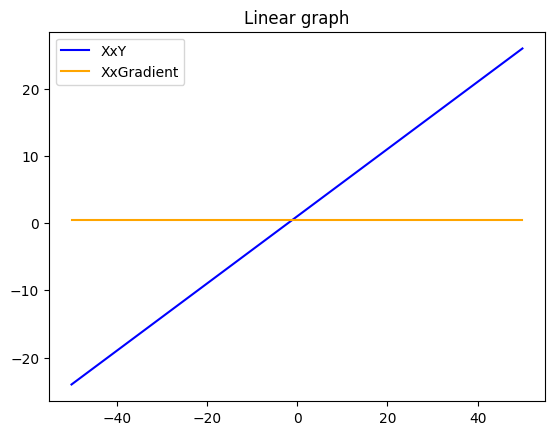

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, color='b', label = 'XxY')
ax.plot(x[1:], gradient, color='orange', label ='XxGradient')
plt.title("Linear graph")
plt.legend()
plt.show()

# **[Problem 5] Python functions**
Please refer to the template and create a Python function that collectively performs the range from Problem 1 to Problem 3.

Then, obtain the gradients of the following three formulas at intervals of 0.1 and output them as ndarray.

y
=
x
2
(
−
Fifty
≤
x
≤
Fifty
)

y
=
2
x
2
+
2
x
(
−
Fifty
≤
x
≤
Fifty
)

y
=
s
i
n
(
x
1
2
)
(
0
≤
x
≤
Fifty
)

Also, draw a graph as in question 4.

np.sin()Useto calculate the trigonometric function sin on an ndarray .

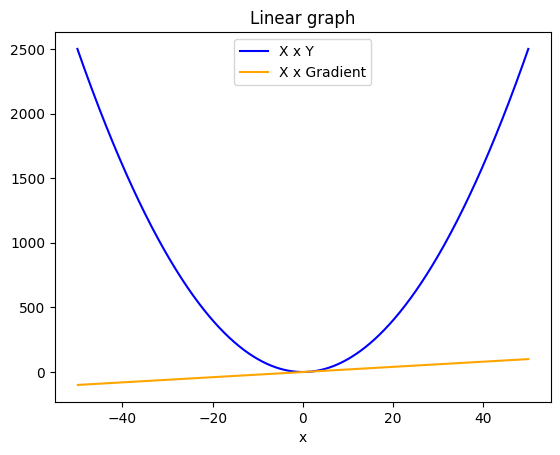

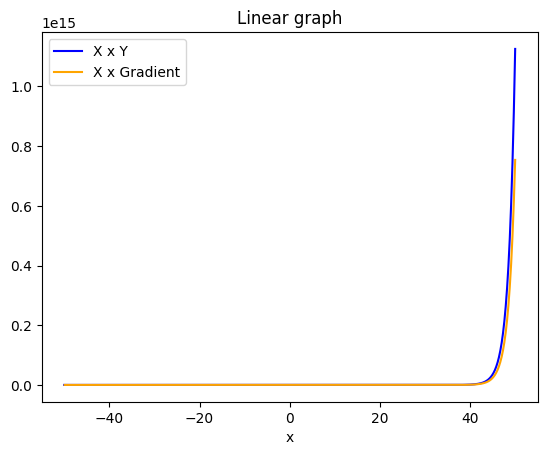

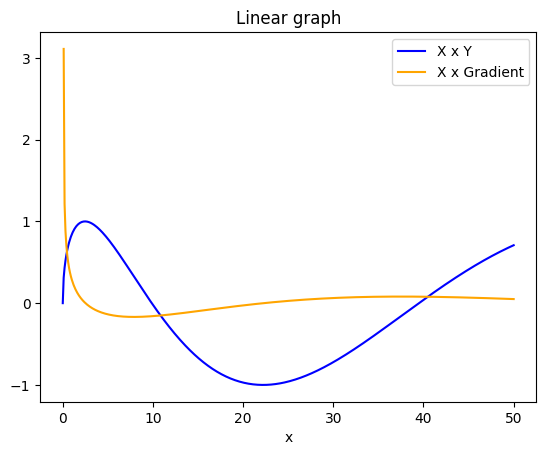

In [10]:
import array
####### Problem 5 #######
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    x_range = np.arange(*x_range)
    array_xy = np.stack((x_range,function),axis=1)
    x_change = x_range[1:] - x_range[:-1]
    y_change = function[1:] - function[:-1]
    gradient = y_change/x_change
    return array_xy, gradient

def function1(array_x):
    array_x = np.arange(*array_x)
    array_y = array_x**2
    return array_y
def function2(array_x):
    array_x = np.arange(*array_x)
    array_y = 2*(array_x)**2+2**array_x
    return array_y
def function3(array_x):
    array_x = np.arange(*array_x)
    array_y = np.sin(np.sqrt(array_x))
    return array_y

def draw_plot(x,y):
  fig,ax = plt.subplots()
  ax.plot(x[:,0], x[:,1], color='b', label = 'X x Y')
  ax.plot(x[1:,0], y, color='orange', label ='X x Gradient')
  plt.title("Linear graph")
  plt.xlabel("x")
  plt.legend()
  plt.show()


array_x = (-50,50.1,0.1)
array_xy1, gradient1 = compute_gradient(function1(array_x))
draw_plot(array_xy1,gradient1)


array_xy2, gradient2 = compute_gradient(function2(array_x))
draw_plot(array_xy2,gradient2)


array_x3 = (0,50.1,0.1)
array_xy3, gradient3 = compute_gradient(function3(array_x3),array_x3)
draw_plot(array_xy3,gradient3)

# **[Question 6] Find the minimum value**
Find the minimum value of y for the function dealt with in question 5. The range of x is also the same as problem 5.

This time, use the min and argmin methods of ndarray instead of gradient descent. You can get the minimum value with the min method and the index of the minimum value with the argmin method.

Also show the gradient before and after taking the minimum y.

Minimum value of function 1 5.048709793414476e-25, index: 500
Minimum value of function 2 0.9505505632959851, index: 498
Minimum value of function 3 -0.9999997540298113, index: 222


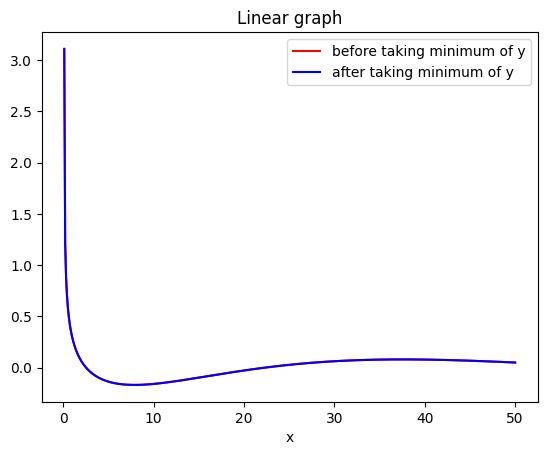

In [12]:
min1 = array_xy1[:,1].min()
argmin1 = array_xy1[:,1].argmin()
print('Minimum value of function 1 {}, index: {}'.format(min1,argmin1))

min2 = array_xy2[:,1].min()
argmin2 = array_xy2[:,1].argmin()
print('Minimum value of function 2 {}, index: {}'.format(min2,argmin2))

min3 = array_xy3[:,1].min()
argmin3 = array_xy3[:,1].argmin()
print('Minimum value of function 3 {}, index: {}'.format(min3,argmin3))


x_range = np.arange(*array_x3)
x_range = np.delete(x_range, argmin3)
y = np.delete(function3(array_x3),argmin3)
y_change = y[1:]-y[:-1]
x_change = x_range[1:]-x_range[:-1]
gradient = y_change/x_change

fig, ax = plt.subplots()
ax.plot(x_range[1:], gradient, color='red', label = 'before taking minimum of y')
ax.plot(array_xy3[1:,0], gradient3, color='b', label ='after taking minimum of y')
plt.title("Linear graph")
plt.xlabel("x")
plt.legend()
plt.show()